# 2.2 Práctica. Análisis, implementación y prueba de una máquina de aprendizaje no supervisado.

## Introducción de la actividad.

Las máquinas con aprendizaje no supervisado se utilizan cuando el sistema de aprendizaje necesita reconocer similitudes o características de los datos de entrada. El análisis, implementación y prueba de una máquina de aprendizaje no supervisado permitirá comprender el funcionamiento de forma clara y precisa.

## Propósito de la actividad

Comprender el funcionamiento de una máquina de aprendizaje no supervisado.

## Instrucciones.

Analicé, implemente y pruebe una máquina de aprendizaje no supervisado, la implementación de la máquina será en el lenguaje de su preferencia. La práctica deberá ser presentada en un archivo PDF, que deberá contener:

- Portada.

- Análisis de la máquina de aprendizaje no supervisado (funcionamiento del algoritmo).

- Implementación de la máquina de aprendizaje no supervisado (implementación del algoritmo).

- Prueba de la máquina de aprendizaje no supervisado (prueba del algoritmo).

- Conclusiones.

## K-Means

### ¿Qué es K-Means?

K-Means es un algoritmo de aprendizaje no supervisado que pertenece a la familia de algoritmos de clustering (agrupamiento). Su objetivo es agrupar un conjunto de datos en **k** clusters (grupos) homogéneos, donde cada punto pertenece al cluster cuyo centroide (centro) es más cercano.

### Características principales

- **No supervisado**: No requiere datos etiquetados para entrenar
- **Iterativo**: Realiza varias iteraciones hasta converger
- **Basado en distancia**: Utiliza la distancia euclidiana entre puntos
- **Flexible**: El número de clusters (k) se define manualmente
- **Eficiente**: Tiene baja complejidad computacional comparado con otros algoritmos de clustering

### Funcionamiento del Algoritmo K-Means

#### Paso 1: Inicialización
1. Se seleccionan aleatoriamente **k** puntos del conjunto de datos como centroides iniciales
2. Estos puntos representan los centros iniciales de los k clusters

#### Paso 2: Asignación
1. Cada punto de datos se asigna al cluster cuyo centroide está más cercano
2. La distancia se calcula típicamente usando la **distancia euclidiana**: 
   $$d = \sqrt{(x_1 - c_1)^2 + (x_2 - c_2)^2 + ... + (x_n - c_n)^2}$$

#### Paso 3: Actualización de Centroides
1. Se recalcula el centroide de cada cluster como el promedio de todos los puntos asignados a ese cluster
2. Nuevo centroide: $$c_j = \frac{1}{|C_j|} \sum_{x_i \in C_j} x_i$$
   - Donde $|C_j|$ es el número de puntos en el cluster j
   - $C_j$ es el conjunto de puntos asignados al cluster j

#### Paso 4: Convergencia
1. Se repiten los pasos 2 y 3 hasta que:
   - Los centroides no cambien significativamente, o
   - Se alcance el número máximo de iteraciones definido

### Formulación Matemática

La función objetivo que K-Means intenta minimizar es la **inercia** (suma de distancias cuadradas):

$$J = \sum_{i=1}^{k} \sum_{x_j \in C_i} \|x_j - c_i\|^2$$

Donde:
- $k$ es el número de clusters
- $C_i$ es el conjunto de puntos en el cluster i
- $c_i$ es el centroide del cluster i
- $\|x_j - c_i\|^2$ es la distancia euclidiana cuadrada

### Ventajas de K-Means

✓ **Simple de implementar y entender**
✓ **Computacionalmente eficiente** (O(n*k*i*d) donde i es el número de iteraciones y d la dimensión)
✓ **Escala bien con grandes conjuntos de datos**
✓ **Resultados interpretables**
✓ **Converge rápidamente en la mayoría de casos**

### Desventajas de K-Means

✗ **Sensible a la inicialización**: Diferentes inicializaciones pueden dar resultados diferentes
✗ **Requiere definir k previamente**: No determina automáticamente el número óptimo de clusters
✗ **Asume clusters esféricos**: Puede no funcionar bien con clusters de formas irregulares
✗ **Sensible a outliers**: Los valores atípicos pueden afectar la posición de los centroides
✗ **Convergencia local**: Puede quedar atrapado en un óptimo local, no global

### Método del Codo

Para determinar el número óptimo de clusters (k), se utiliza el **método del codo**:

1. Se calcula la inercia para diferentes valores de k (generalmente de 1 a 10)
2. Se gráfica k vs inercia
3. Se busca el punto donde la disminución de inercia comienza a ralentizarse (forma de codo)
4. Ese punto generalmente representa el mejor balance entre número de clusters y calidad del clustering

En la siguiente sección aplicaremos K-Means a nuestro dataset de usuarios de gimnasio.

## Dependencias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

## Dataset

Para este caso vamos a utilizar un dataset simple que muestra la edad de usuarios y la cantidad de visitas a la semana a un gimnasio.

In [2]:
data = {
    "Edad": [18, 20, 22, 25, 27, 30, 35, 38, 40, 45, 50, 55],
    "Visitas_por_semana": [1, 2, 1, 3, 2, 4, 3, 4, 5, 6, 5, 6],
}

df = pd.DataFrame(data)

df

,Edad,Visitas_por_semana
0,18,1
1,20,2
2,22,1
3,25,3
4,27,2
5,30,4
6,35,3
7,38,4
8,40,5
9,45,6


### Escalamiento de datos

Para evitar errores en el algoritmo vamos a realizar un escalamiento de datos haciendo uso de `MinMaxScaler` que es un objeto de scikit-learn que hace el escalamiento de los datos por nosotros.

In [3]:
escalador = MinMaxScaler().fit(df)

df = pd.DataFrame(escalador.transform(df), columns=df.columns)

df

,Edad,Visitas_por_semana
0,0.000000,0.0
1,0.054054,0.2
2,0.108108,0.0
3,0.189189,0.4
4,0.243243,0.2
5,0.324324,0.6
6,0.459459,0.4
7,0.540541,0.6
8,0.594595,0.8
9,0.729730,1.0


## K-Means

Ahora vamos a continuar con el algoritmo de K-Means que nos va a regresar los datos clusterizados, la ubicación de los centroides y la inercia.

### Método del codo

Con este método analizamos la inercia con respecto al numero de centroides para identificar el mas adecuado para nuestro caso que seria el que tenga menor numero de centroides y menor inercia.

,k,inertia
0,1,2.577684
1,2,0.707630
2,3,0.315581
3,4,0.236146
4,5,0.165220
5,6,0.137458
6,7,0.142123
7,8,0.072963
8,9,0.045201
9,10,0.023740


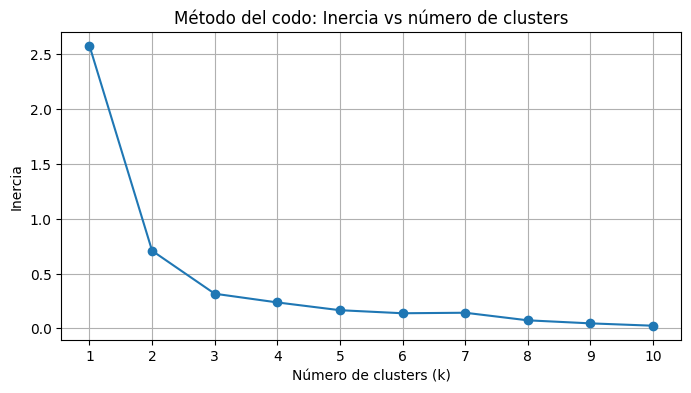

In [4]:
# Cálculo de inercia para distintos números de clusters y visualización
# Calcula la inercia para k=1..10, muestra la tabla y gráfica el método del codo
inercia = []
ks = list(range(1, 11))

for k in ks:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df)
    inercia.append(km.inertia_)

df_inercia = pd.DataFrame({'k': ks, 'inertia': inercia})

# Mostrar la tabla de inercia
display(df_inercia)

# Graficar Inercia vs k (Método del codo)
plt.figure(figsize=(8,4))
plt.plot(df_inercia['k'], df_inercia['inertia'], marker='o')
plt.xticks(df_inercia['k'])
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del codo: Inercia vs número de clusters')
plt.grid(True)
plt.show()

Podemos observar en el gráfico que hay 2 puntos donde se podría argumentar que son "el codo" siendo con 2k y 3k, en este caso depende del contexto de los datos y el objetivo del analysis y es argumentarle cual de los 2 es mejor pero para el caso de esta practica se va tomar el caso con 3k debido a su baja inercia.

### Resultado de datos con 3 clusters

Una vez con el dato de que vamos a usar 3 clusters vamos a graficar los datos clasificados en clusters y los centroides de los mismos.

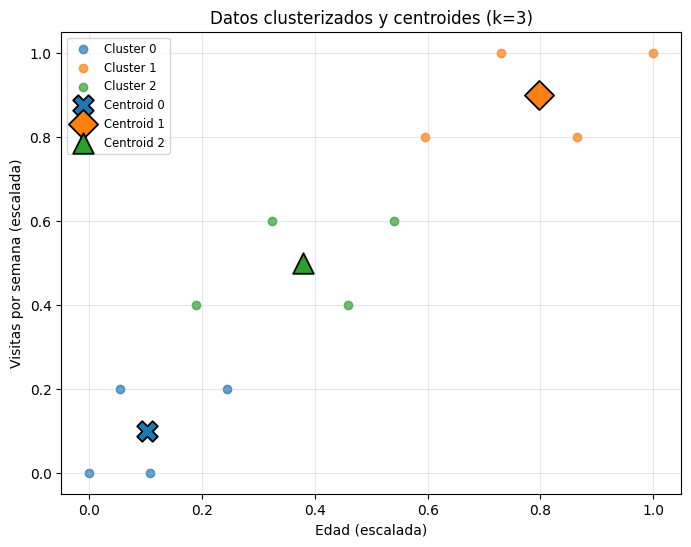

In [12]:
kmeans = KMeans(n_clusters=3, random_state=42).fit(df)
# random_state : int, RandomState instance or None, default=None
# Determines random number generation for centroid initialization. Use an int to make the randomness deterministic. 

# Agregamos el cluster al que pertenecen los datos
df["cluster"] = kmeans.labels_

# Ubicación de los centroides
centroids = kmeans.cluster_centers_

# Paleta de colores y marcadores para centroides
palette = plt.cm.tab10
markers = ['X', 'D', '^', 's', 'P', '*', 'v', '<', '>', 'H']

plt.figure(figsize=(8,6))

# Dibujar cada cluster con color distinto
for cluster in range(kmeans.n_clusters):
    color = palette(cluster % 10)
    cluster_data = df[df["cluster"] == cluster]
    plt.scatter(cluster_data["Edad"], cluster_data["Visitas_por_semana"], 
                c=[color], label=f'Cluster {cluster}', alpha=0.7)

# Dibujar centroides con marcador distinto y borde negro
for i, centroid in enumerate(centroids):
    m = markers[i % len(markers)]
    color = palette(i % 10)
    plt.scatter(centroid[0], centroid[1], marker=m, s=220, c=[color],
                edgecolor='k', linewidth=1.3, label=f'Centroid {i}')

plt.xlabel('Edad (escalada)')
plt.ylabel('Visitas por semana (escalada)')
plt.title('Datos clusterizados y centroides (k=3)')
plt.legend(loc='best', fontsize='small')
plt.grid(alpha=0.3)
plt.show()

## Conclusiones

### Interpretación de Resultados

#### Análisis de los Clusters Identificados

El algoritmo K-Means ha identificado **3 clusters distintos** en el dataset de usuarios del gimnasio, revelando patrones claros de comportamiento según la edad escalada y la frecuencia de visitas:

#### **Cluster 0: Usuarios Jóvenes Poco Frecuentes**
- **Rango de edad escalada**: 0.0 a 0.24
- **Edad real aproximada**: 18 a 26 años
- **Visitas por semana escalada**: 0.0 a 0.4 (muy bajas)
- **Visitas por semana real aproximada**: 1 a 2.4 (muy bajas)
- **Cantidad de usuarios**: 5
- **Interpretación**: Grupo de usuarios jóvenes que asisten muy pocas veces al gimnasio. Pueden ser usuarios ocasionales, principiantes o con poco compromiso con el ejercicio regular.

#### **Cluster 1: Usuarios Adultos Muy Frecuentes**
- **Rango de edad escalada**: 0.59 a 1.0
- **Edad real aproximada**: 40 a 55 años
- **Visitas por semana escalada**: 0.8 a 1.0 (muy altas)
- **Visitas por semana real aproximada**: 4.8 a 6 (muy altas)
- **Cantidad de usuarios**: 4
- **Interpretación**: Grupo de usuarios adultos y de mayor edad con alta frecuencia de visitas. Son usuarios comprometidos y consistentes con sus rutinas de ejercicio. Representan el perfil ideal de cliente leal.

#### **Cluster 2: Usuarios de Edad Media con Frecuencia Moderada**
- **Rango de edad escalada**: 0.19 a 0.54
- **Edad real aproximada**: 27 a 43 años
- **Visitas por semana escalada**: 0.4 a 0.8 (moderadas)
- **Visitas por semana real aproximada**: 2.4 a 4.8 (moderadas)
- **Cantidad de usuarios**: 3
- **Interpretación**: Grupo de usuarios en edad intermedia con asistencia moderada y consistente. Pueden ser usuarios en transición hacia mayor compromiso o simplemente mantienen un nivel de ejercicio balanceado.

### Hallazgos Principales

✓ **Correlación positiva entre edad y frecuencia**: A mayor edad (dentro del rango analizado), mayor es la frecuencia de visitas. Los usuarios adultos son más consistentes.

✓ **Segmentación clara**: Los 3 clusters están bien definidos y separados, lo que indica que el valor k=3 fue una excelente elección.

✓ **Patrón de comportamiento**: Existe un patrón ascendente claro donde los usuarios jóvenes tienen baja asistencia y los adultos mayor asistencia.

### Conclusión Final

El algoritmo K-Means ha demostrado ser efectivo para identificar grupos homogéneos de usuarios del gimnasio basándose en su edad y frecuencia de asistencia. Los resultados sugieren que **la edad es un factor importante en la predicción de la frecuencia de visitas**, con usuarios adultos mostrando un comportamiento más comprometido con el ejercicio regular. Este tipo de análisis es valioso para la **estrategia de marketing, retención de clientes y personalización de servicios** en negocios como gimnasios o centros de fitness.

## Referencias

[Repositorio de GitHub con Jupiter Notebook de la Practica.](https://github.com/RKCbas/Maestria-en-Inteligencia-Artificial---Practicas/blob/main/Cuatrimestre%201/2%20-%20Inteligencia%20artificial%20en%20la%20transformacion%20digital/Practica%202.2.ipynb)